In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import nltk
import nltk.corpus 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from gensim.models.word2vec import Word2Vec

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiranrawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train_news = pd.read_csv('../data/processed/train.csv')
val_news = pd.read_csv('../data/processed/val.csv')
test_news = pd.read_csv('../data/processed/test.csv')

In [5]:
print("====Label Distribution in Training Data ====")
print(train_news['label'].value_counts())
print("====Label Distribution in Validation Data ====")
print(val_news['label'].value_counts())
print("====Label Distribution in Test Data====")
print(test_news['label'].value_counts())

====Label Distribution in Training Data ====
True     5752
False    4488
Name: label, dtype: int64
====Label Distribution in Validation Data ====
True     668
False    616
Name: label, dtype: int64
====Label Distribution in Test Data====
True     714
False    553
Name: label, dtype: int64


By seeing the label's distribution, it seems like a balanced class. As number of 'True' and 'False' lables are kind of equally distributed in the dataset.

In [6]:
train_news.groupby('label').describe()

statement                                                               
          count unique                                                top freq
label                                                                         
False      4488   4481  On changing the rules for filibusters on presi...    3
True       5752   5746         Says Mitt Romney flip-flopped on abortion.    2

from above information, we know that:

1. About 44% of the statements are classified as a True.
2. There are some duplicate messages, since the number of unique values lower than the count values of the text.

In the next part, lext check the length of each text messages to see whether it is correlated with the text classified as a True or False.

In [7]:
train_news['length'] = train_news['statement'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12691f9d0>,
      dtype=object)

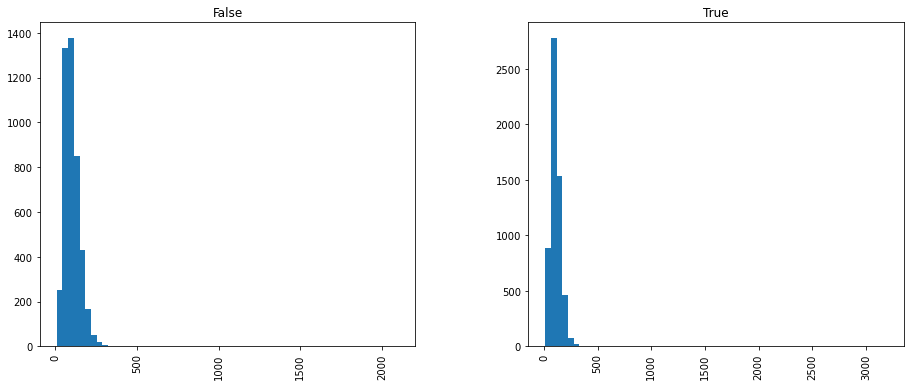

In [8]:
train_news.hist(column='length',by='label',bins=60, figsize=(15,6))

from above figure, we can see almost both True and False statements have length under 500.

In [9]:
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [10]:
train_news['statement'].apply(process_text).head()

0    [Says, Annies, List, political, group, support...
1    [decline, coal, start, started, natural, gas, ...
2    [Hillary, Clinton, agrees, John, McCain, votin...
3    [Health, care, reform, legislation, likely, ma...
4           [economic, turnaround, started, end, term]
Name: statement, dtype: object

### CountVectorizer : 

It Convert a collection of text documents to a matrix of token counts.


### TfidfTransformer : 

1. TF (Term Frequency): The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

2. IDF (Inverse Data Frequency): The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

3. Lastly, the TF-IDF is simply the TF multiplied by IDF.

### Stemming: 

From Wikipedia, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. E.g. A stemming algorithm reduces the words “fishing”, “fished”, and “fisher” to the root word, “fish”.


### APPLY STEMMING?

In [11]:
count_vect = CountVectorizer(analyzer=process_text)
X_train_counts = count_vect.fit_transform(train_news.statement)
X_train_counts.shape

(10240, 14694)

Here by doing ‘count_vect.fit_transform(train_news.statement)’, we are learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features]

In [12]:
print(count_vect)
print(X_train_counts)

CountVectorizer(analyzer=<function process_text at 0x11ac8dca0>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)
  (0, 4480)	1
  (0, 1168)	1
  (0, 3292)	1
  (0, 11437)	1
  (0, 9014)	1
  (0, 13467)	1
  (0, 13747)	1
  (0, 5396)	1
  (0, 7472)	1
  (1, 7386)	1
  (1, 6780)	1
  (1, 13218)	1
  (1, 13219)	2
  (1, 10660)	1
  (1, 8841)	1
  (1, 13828)	1
  (1, 6113)	1
  (1, 4098)	1
  (1, 2529)	1
  (1, 5172)	1
  (1, 1523)	1
  (1, 5513)	1
  (2, 2529)	1
  (2, 2759)	1
  (2, 1745)	1
  :	:
  (10237, 2498)	1
  (10237, 11151)	1
  (10237, 10932)	1
  (10238, 5074)	1
  (10238, 5665)	1
  (10238, 1907)	1
  (10238, 13934)	1
  (10238, 8024)	1
  (10238, 1908)	1
  (10238,

In [13]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(10240, 14694)

In [14]:
print(X_train_tfidf)

  (0, 13747)	0.4111721462668922
  (0, 13467)	0.268763909950058
  (0, 11437)	0.288299097736884
  (0, 9014)	0.29572900100023347
  (0, 7472)	0.3487778612305985
  (0, 5396)	0.2913344923941701
  (0, 4480)	0.11315616700304243
  (0, 3292)	0.42942130476966167
  (0, 1168)	0.42942130476966167
  (1, 13828)	0.1992848257109974
  (1, 13219)	0.4969030230072441
  (1, 13218)	0.2798176297170201
  (1, 10660)	0.2739440793861925
  (1, 8841)	0.22394629275523875
  (1, 7386)	0.3062283783186632
  (1, 6780)	0.2758031142293708
  (1, 6113)	0.295266927264955
  (1, 5513)	0.20276327129406949
  (1, 5172)	0.24939236562772774
  (1, 4098)	0.16242753464879256
  (1, 2529)	0.21935004602848507
  (1, 1523)	0.2739440793861925
  (2, 14363)	0.2756773185579947
  (2, 8899)	0.26938879684469363
  (2, 7809)	0.39530812320324743
  :	:
  (10237, 4480)	0.08541385115156024
  (10237, 2498)	0.3005921835315536
  (10237, 1869)	0.18420294004003412
  (10238, 13934)	0.39490677491613024
  (10238, 10075)	0.43475306416516835
  (10238, 8024)	0.4237